### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics Using Python

## Demonstration: Fit.ly case study

Fit.ly, a fitness tracking device company, is upgrading their app to provide users with a leader board. The leader board will show aggregated data and allow users to measure their own performance against the user base. In these early stages of development, the company is looking at various possible visualisations that can be used on the leader board.

Let’s explore what’s possible to visualise for the Fit.ly platform! 

## 1. Prepare your workstation

In [1]:
# Import Matplotlib, Seaborn, and Pandas.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file.
fitness = pd.read_csv('../Data/daily_activity.csv')

# View the DataFrame.
print(fitness.shape)
print(fitness.dtypes)
print(fitness.columns)
fitness.head()

(940, 15)
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
# Create a DataFrame with specified columns.
distance = fitness[['Id', 'ActivityDate', 'VeryActiveDistance',
                   'ModeratelyActiveDistance', 'LightActiveDistance',
                   'SedentaryActiveDistance']]

# View the Dataframe
print(distance.head())

           Id ActivityDate  VeryActiveDistance  ModeratelyActiveDistance  \
0  1503960366    4/12/2016                1.88                      0.55   
1  1503960366    4/13/2016                1.57                      0.69   
2  1503960366    4/14/2016                2.44                      0.40   
3  1503960366    4/15/2016                2.14                      1.26   
4  1503960366    4/16/2016                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  
0                 6.06                      0.0  
1                 4.71                      0.0  
2                 3.91                      0.0  
3                 2.83                      0.0  
4                 5.04                      0.0  


In [7]:
# Reshape the DataFrame from wide to long. 
distance_long = distance.melt(id_vars=['Id', 'ActivityDate'], 
                              var_name='DistanceType', value_name='Distance')

# View the DataFrame.
print(distance_long.head())

           Id ActivityDate        DistanceType  Distance
0  1503960366    4/12/2016  VeryActiveDistance      1.88
1  1503960366    4/13/2016  VeryActiveDistance      1.57
2  1503960366    4/14/2016  VeryActiveDistance      2.44
3  1503960366    4/15/2016  VeryActiveDistance      2.14
4  1503960366    4/16/2016  VeryActiveDistance      2.71


In [8]:
# Format values in the columns.
distance_long['DistanceType'] = distance_long['DistanceType'].str.replace('ActiveDistance', "")

In [9]:
distance_long['DistanceType']

0            Very
1            Very
2            Very
3            Very
4            Very
          ...    
3755    Sedentary
3756    Sedentary
3757    Sedentary
3758    Sedentary
3759    Sedentary
Name: DistanceType, Length: 3760, dtype: object

In [10]:
# Add a filter to identify logged-in user.
individual = distance_long[distance_long['Id'] == 1503960366]

In [11]:
individual

,Id,ActivityDate,DistanceType,Distance
0,1503960366,4/12/2016,Very,1.88
1,1503960366,4/13/2016,Very,1.57
2,1503960366,4/14/2016,Very,2.44
3,1503960366,4/15/2016,Very,2.14
4,1503960366,4/16/2016,Very,2.71
...,...,...,...,...
2846,1503960366,5/8/2016,Sedentary,0.00
2847,1503960366,5/9/2016,Sedentary,0.00
2848,1503960366,5/10/2016,Sedentary,0.00
2849,1503960366,5/11/2016,Sedentary,0.00


## 2. Create a simple barplot

<AxesSubplot:xlabel='DistanceType', ylabel='Distance'>

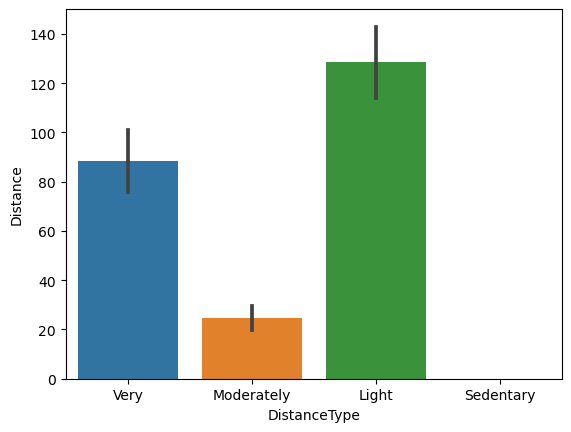

In [16]:
# Create a barplot.
sns.barplot(x='DistanceType', y='Distance', estimator=sum, data=individual)

In [20]:
individual

,Id,ActivityDate,DistanceType,Distance
0,1503960366,4/12/2016,Very,1.88
1,1503960366,4/13/2016,Very,1.57
2,1503960366,4/14/2016,Very,2.44
3,1503960366,4/15/2016,Very,2.14
4,1503960366,4/16/2016,Very,2.71
...,...,...,...,...
2846,1503960366,5/8/2016,Sedentary,0.00
2847,1503960366,5/9/2016,Sedentary,0.00
2848,1503960366,5/10/2016,Sedentary,0.00
2849,1503960366,5/11/2016,Sedentary,0.00


In [19]:
test= individual.groupby('DistanceType')[['Distance']].sum()
test

,Distance
DistanceType,
Light,128.74
Moderately,24.62
Sedentary,0.00
Very,88.61


## 3. Create a stacked barplot

<AxesSubplot:>

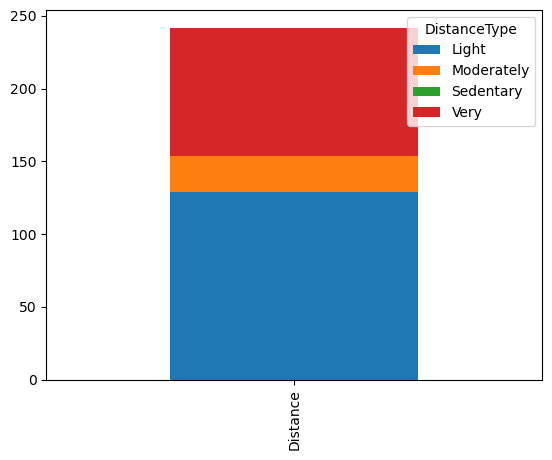

In [14]:
# Stacked barplots with Pandas
individual.groupby('DistanceType')[['Distance']].sum().T.plot.bar(stacked=True)

## 4. Create a grouped barplot

In [22]:
# Pair the data of two individuals.
pair = distance_long[distance_long['Id'].isin([8877689391, 1503960366])]

pair

,Id,ActivityDate,DistanceType,Distance
0,1503960366,4/12/2016,Very,1.88
1,1503960366,4/13/2016,Very,1.57
2,1503960366,4/14/2016,Very,2.44
3,1503960366,4/15/2016,Very,2.14
4,1503960366,4/16/2016,Very,2.71
...,...,...,...,...
3755,8877689391,5/8/2016,Sedentary,0.00
3756,8877689391,5/9/2016,Sedentary,0.05
3757,8877689391,5/10/2016,Sedentary,0.00
3758,8877689391,5/11/2016,Sedentary,0.00


<AxesSubplot:xlabel='DistanceType', ylabel='Distance'>

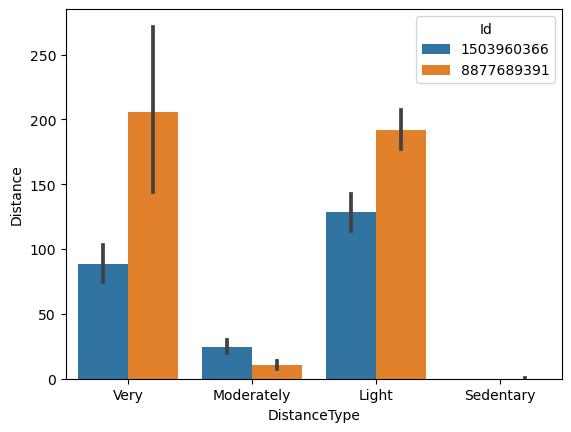

In [23]:
# Create a grouped barplot.
sns.barplot(x='DistanceType', y='Distance', hue='Id', estimator=sum, data=pair)

## 5. Create a lineplot

<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

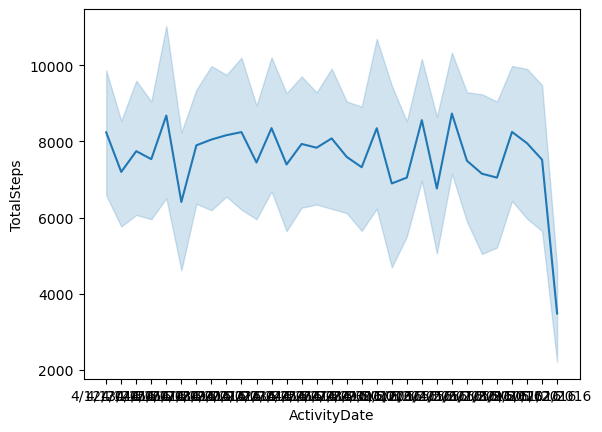

In [24]:
# Create a simple lineplot.
sns.lineplot(x='ActivityDate', y='TotalSteps', data=fitness)

  ActivityDate  TotalSteps
0   2016-04-12      271816
1   2016-04-13      237558
2   2016-04-14      255538
3   2016-04-15      248617
4   2016-04-16      277733


<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

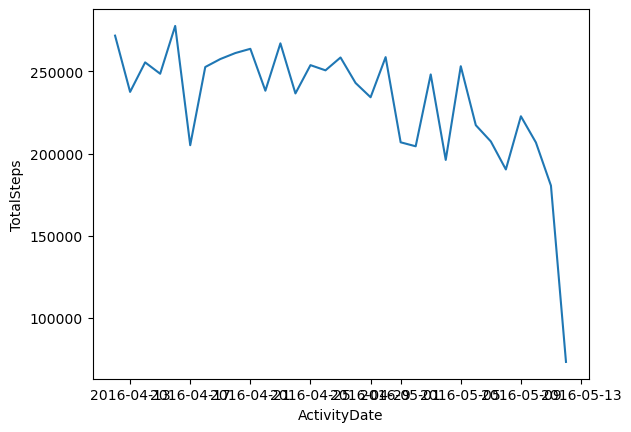

In [32]:
# Create a time-series.
steps_time_series = fitness\
 .groupby('ActivityDate')[['TotalSteps']]\
 .sum()\
 .reset_index()\
 .copy()


# Format data with datetime() function.
steps_time_series['ActivityDate'] = pd.to_datetime(steps_time_series['ActivityDate'])

# View the output.
print(steps_time_series.head())


# Create a lineplot without confidence level shade.
sns.lineplot(x='ActivityDate', y='TotalSteps', data=steps_time_series)

In [33]:
steps_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ActivityDate  31 non-null     datetime64[ns]
 1   TotalSteps    31 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 624.0 bytes


In [34]:
steps_time_series['ActivityDate']

0    2016-04-12
1    2016-04-13
2    2016-04-14
3    2016-04-15
4    2016-04-16
5    2016-04-17
6    2016-04-18
7    2016-04-19
8    2016-04-20
9    2016-04-21
10   2016-04-22
11   2016-04-23
12   2016-04-24
13   2016-04-25
14   2016-04-26
15   2016-04-27
16   2016-04-28
17   2016-04-29
18   2016-04-30
19   2016-05-01
20   2016-05-10
21   2016-05-11
22   2016-05-12
23   2016-05-02
24   2016-05-03
25   2016-05-04
26   2016-05-05
27   2016-05-06
28   2016-05-07
29   2016-05-08
30   2016-05-09
Name: ActivityDate, dtype: datetime64[ns]

<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

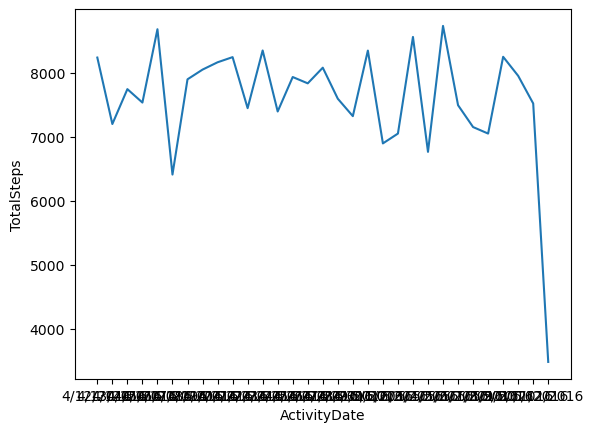

In [35]:
# Create a simple lineplot without confidence interval.
sns.lineplot(x='ActivityDate', y='TotalSteps', data=fitness, ci=None)

<AxesSubplot:xlabel='ActivityDate', ylabel='TotalSteps'>

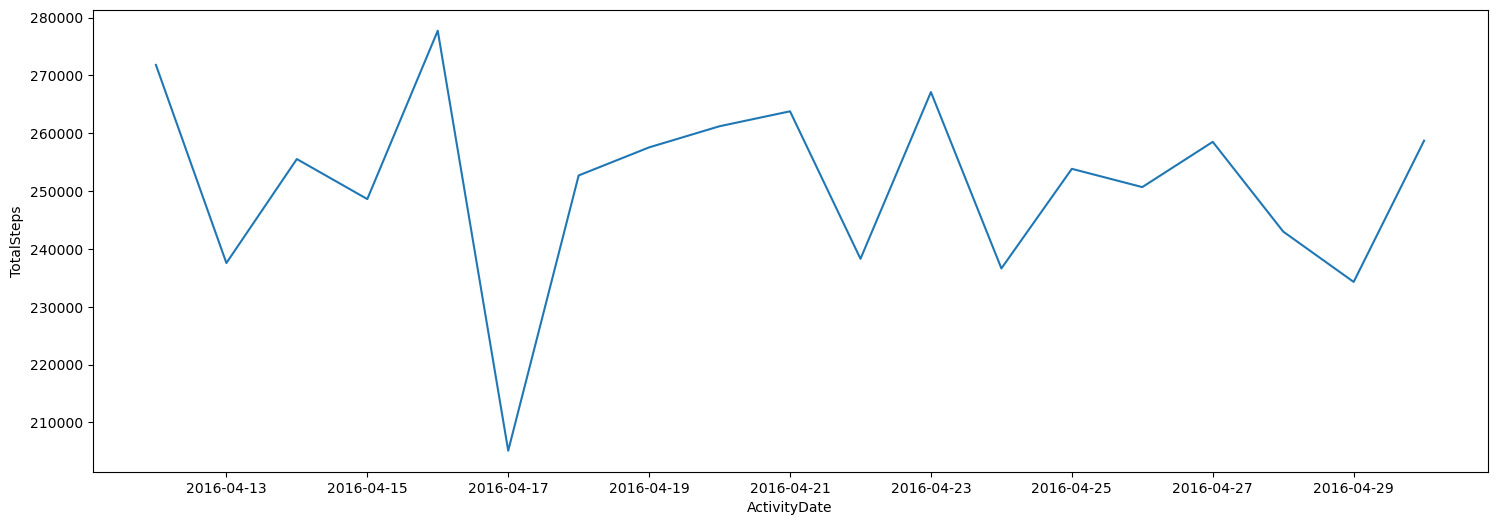

In [40]:
# Create plot size.
plt.figure(figsize=(18, 6))

# Create a lineplote with specific date.
sns.lineplot(x='ActivityDate', y='TotalSteps',
             data=steps_time_series[steps_time_series['ActivityDate'] < '2016-05-01'])



## 6. Highlighting and adding annotations